# Importação das Biblioecas

In [2]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.metrics import confusion_matrix, accuracy_score

# Importar os Dados

### Dados trimestrais

In [3]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,1.2.2 stdr,1.2.11 sum,1.2.11 mean,...,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr,ticker
0,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
1,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,5.747137e+08,73738202.72,4.915880e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
2,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,6.897587e+08,76949517.70,5.496394e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
3,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
4,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,1.153764e+09,50223493.13,8.370582e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
229,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
230,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
231,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11


In [4]:
data_ticker = pd.DataFrame()
for ticker in quarterly_reports['ticker'].unique():
    tag = ticker + ".SA"
    print(tag)
    temp_data_ticker = yf.download(tickers=tag, multi_level_index=False)
    temp_data_ticker['ticker'] = ticker
    data_ticker = pd.concat([data_ticker,temp_data_ticker])
data_ticker

AAZQ11.SA
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRX11.SA']: YFInvalidPeriodError("AGRX11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


AGRX11.SA
BBGO11.SA


[*********************100%***********************]  1 of 1 completed


CPTR11.SA


[*********************100%***********************]  1 of 1 completed


CRAA11.SA


[*********************100%***********************]  1 of 1 completed


DCRA11.SA


[*********************100%***********************]  1 of 1 completed


EGAF11.SA


[*********************100%***********************]  1 of 1 completed


FGAA11.SA


[*********************100%***********************]  1 of 1 completed


FLEM11.SA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FLEM11.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FLEM11.SA&crumb=dd81N0JPfwI
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLEM11.SA']: AttributeError("'NoneType' object has no attribute 'update'")


FZDB11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FZDB11.SA']: YFInvalidPeriodError("FZDB11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


GCRA11.SA


[*********************100%***********************]  1 of 1 completed


GRWA11.SA


[*********************100%***********************]  1 of 1 completed


HGAG11.SA


[*********************100%***********************]  1 of 1 completed


IAAG11.SA


[*********************100%***********************]  1 of 1 completed


IAGR11.SA


[*********************100%***********************]  1 of 1 completed


JGPX11.SA


[*********************100%***********************]  1 of 1 completed


KNCA11.SA


[*********************100%***********************]  1 of 1 completed


KOPA11.SA


[*********************100%***********************]  1 of 1 completed


LSAG11.SA


[*********************100%***********************]  1 of 1 completed


NCRA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NCRA11.SA']: YFInvalidPeriodError("NCRA11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


OIAG11.SA


[*********************100%***********************]  1 of 1 completed


PLCA11.SA


[*********************100%***********************]  1 of 1 completed


RURA11.SA


[*********************100%***********************]  1 of 1 completed


RZAG11.SA


[*********************100%***********************]  1 of 1 completed


RZEO11.SA


[*********************100%***********************]  1 of 1 completed


SNAG11.SA


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,ticker,Adj Close
Date,,,,,,,
2022-12-21,6.999205,7.013161,6.978270,6.978270,78854.0,AAZQ11,NaN
2022-12-22,6.978268,7.117833,6.629354,7.117833,31942.0,AAZQ11,NaN
2022-12-23,6.978268,6.978268,6.838702,6.978268,6389.0,AAZQ11,NaN
2022-12-26,6.964312,7.041073,6.873595,7.041073,38590.0,AAZQ11,NaN
2022-12-27,6.768922,6.964313,6.559574,6.964313,21828.0,AAZQ11,NaN
...,...,...,...,...,...,...,...
2025-04-11,9.481584,9.481584,9.392601,9.402488,0.0,SNAG11,NaN
2025-04-14,9.580452,9.590339,9.461809,9.491470,0.0,SNAG11,NaN
2025-04-15,9.620000,9.669435,9.540904,9.540904,0.0,SNAG11,NaN


In [5]:
data_ticker_label = data_ticker.reset_index()
data_ticker_label['Date'] = data_ticker_label['Date'].dt.to_period('M')
data_ticker_label = data_ticker_label.groupby(by=['ticker','Date']).var()
data_ticker_label = data_ticker_label.drop(columns=['Close','High','Low','Volume','Adj Close'])
data_ticker_label = data_ticker_label.reset_index()
data_ticker_label

,ticker,Date,Open
0,AAZQ11,2022-12,0.011244
1,AAZQ11,2023-01,0.014352
2,AAZQ11,2023-02,0.003305
3,AAZQ11,2023-03,0.001440
4,AAZQ11,2023-04,0.006627
...,...,...,...
682,SNAG11,2024-12,0.081189
683,SNAG11,2025-01,0.014899
684,SNAG11,2025-02,0.007978
685,SNAG11,2025-03,0.002596


In [6]:
data_ticker_label['Open'].describe()

count      683.000000
mean        34.065574
std        497.174968
min          0.000000
25%          0.007155
50%          0.076495
75%          0.651336
max      12317.899726
Name: Open, dtype: float64

<Axes: xlabel='Open'>

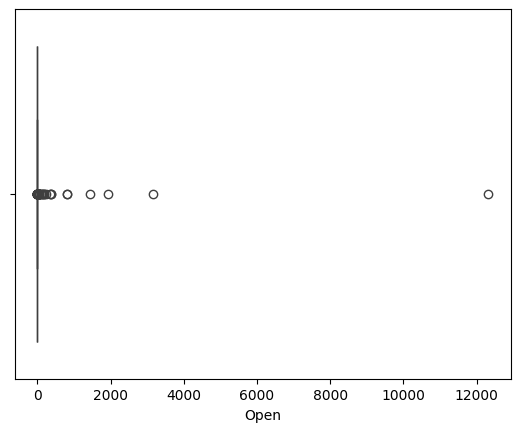

In [7]:
sns.boxplot(x=data_ticker_label['Open'])

<Axes: xlabel='Open'>

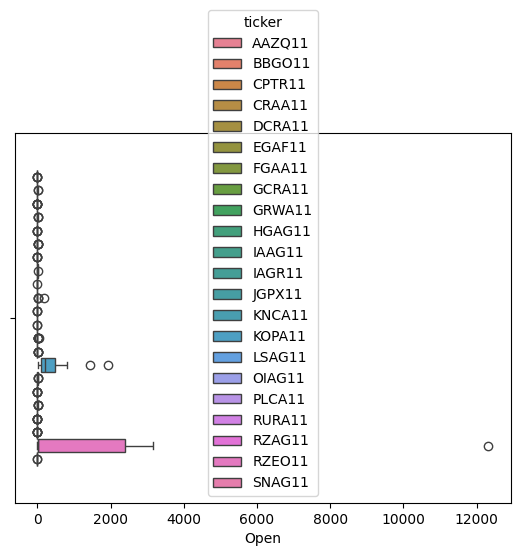

In [8]:
sns.boxplot(x=data_ticker_label['Open'],hue=data_ticker_label['ticker'])

<Axes: xlabel='Open', ylabel='Count'>

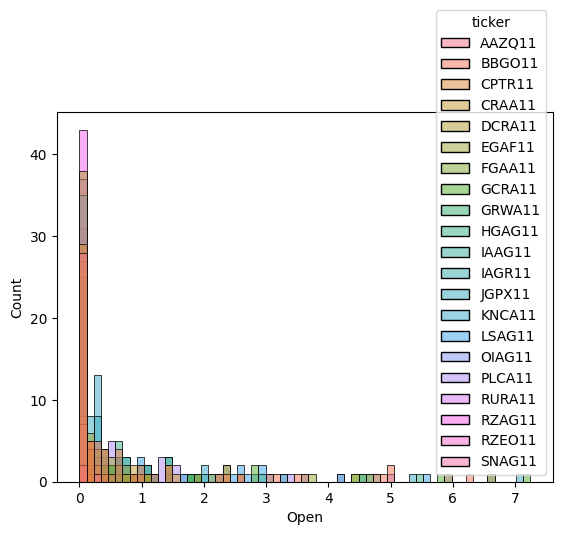

In [9]:
graph_data_ticker = data_ticker_label[data_ticker_label['Open'] < 8]
sns.histplot(x=graph_data_ticker['Open'], hue=graph_data_ticker['ticker'])

<Axes: xlabel='Open'>

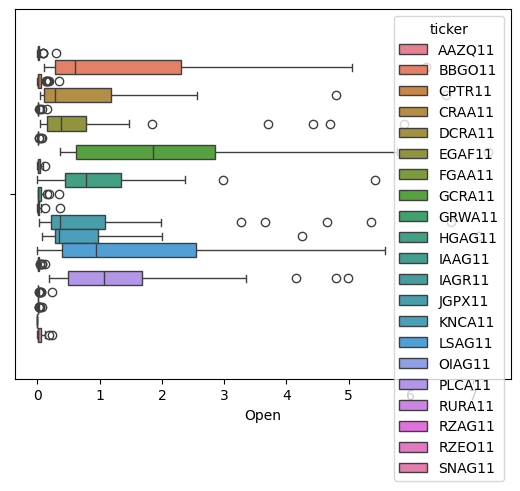

In [10]:
sns.boxplot(x=graph_data_ticker['Open'],hue=graph_data_ticker['ticker'])

In [11]:
tickers = data_ticker_label['ticker'].unique()
tickers

array(['AAZQ11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11',
       'FGAA11', 'GCRA11', 'GRWA11', 'HGAG11', 'IAAG11', 'IAGR11',
       'JGPX11', 'KNCA11', 'KOPA11', 'LSAG11', 'OIAG11', 'PLCA11',
       'RURA11', 'RZAG11', 'RZEO11', 'SNAG11'], dtype=object)

In [16]:
# Baixar os dados do índice
indice = yf.download(tickers=['XFIX11.SA'], multi_level_index=False)
# indice.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
indice = indice.drop(columns=['Close', 'Volume', 'Low', 'High'])
indice.columns = ['index']
# Criar o dataframe beta
print(indice.columns)
variance_index = indice['index'].var()
beta = pd.DataFrame()

# Iterar sobre os tickers
for ticker in tickers:
    # Baixar os dados do ticker
    print(ticker)
    ticker_data = yf.download(tickers=[ticker+'.SA'], multi_level_index=False)
    
    # Resetar o índice para garantir que as datas sejam alinhadas corretamente
    ticker_data = ticker_data.drop(columns=['Close', 'Volume', 'Low', 'High'])
    ticker_data.columns = ['ticker']
    merge_index_ticker = pd.merge(indice, ticker_data, on='Date', how='inner')
    cov = merge_index_ticker['ticker'].cov(merge_index_ticker['index'])
    print(f"Covariância entre {ticker} e o índice: {cov}")
    beta_calculated = cov / variance_index
    print(f"Beta de {ticker}: {beta_calculated}")
    beta = pd.concat([pd.DataFrame({'Ticker': ticker, 'Beta': beta_calculated}),beta])
    # # Mesclar os dados do índice e do ticker para alinhamento
    # merged_data = pd.merge(indice[['Date', 'Open']], ticker_data[['Date', 'Open']], on='Date', suffixes=('_indice', '_ticker'))
    
    # # Calcular a covariância acumulada até cada mês
    # merged_data['Month'] = merged_data['Date'].dt.to_period('M')
    # for month in merged_data['Month'].unique():
    #     monthly_data = merged_data[merged_data['Month'] <= month]
    #     covariance = monthly_data['Open_ticker'].cov(monthly_data['Open_indice'])
    #     beta = beta.append({'Ticker': ticker, 'Month': month, 'Covariance': covariance}, ignore_index=True)

# Exibir o dataframe beta
beta

[*********************100%***********************]  1 of 1 completed


Index(['index'], dtype='object')
AAZQ11


[*********************100%***********************]  1 of 1 completed

Covariância entre AAZQ11 e o índice: 0.11243008628868395
Beta de AAZQ11: 0.1544816277013048


ValueError: If using all scalar values, you must pass an index

In [434]:
index = yf.download('XFIX11.SA',multi_level_index=False,).reset_index()
index['Date'] = index['Date'].dt.to_period('M')
index_variance = index.groupby(by='Date').var()
index_variance = index_variance.drop(columns=['Close','High','Low','Volume']).reset_index()
index_variance

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [435]:
# pd.merge(left=)
index_variance.columns = ['Date','index']
index_variance

,Date,index
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [436]:
marge_index = pd.merge(index_variance,data_ticker_label,on=['Date'])
marge_index

,Date,index,ticker,Open
0,2021-10,0.018042,RZAG11,0.008141
1,2021-11,0.026989,JGPX11,0.022771
2,2021-11,0.026989,RZAG11,0.024099
3,2021-12,0.076505,JGPX11,1.765865
4,2021-12,0.076505,RZAG11,0.015958
...,...,...,...,...
682,2025-04,12.346780,OIAG11,5.187204
683,2025-04,12.346780,PLCA11,478.217561
684,2025-04,12.346780,RURA11,5.293869
685,2025-04,12.346780,RZAG11,6.527729


In [437]:
marge_index.dropna()

,Date,index,ticker,Open
0,2021-10,0.018042,RZAG11,0.008141
1,2021-11,0.026989,JGPX11,0.022771
2,2021-11,0.026989,RZAG11,0.024099
3,2021-12,0.076505,JGPX11,1.765865
4,2021-12,0.076505,RZAG11,0.015958
...,...,...,...,...
682,2025-04,12.346780,OIAG11,5.187204
683,2025-04,12.346780,PLCA11,478.217561
684,2025-04,12.346780,RURA11,5.293869
685,2025-04,12.346780,RZAG11,6.527729


In [438]:
marge_index['Beta'] = marge_index['Open'] - marge_index['index']
marge_index['Label'] = marge_index['Beta'] + marge_index['Open']

marge_index.dropna()

,Date,index,ticker,Open,Beta,Label
0,2021-10,0.018042,RZAG11,0.008141,-0.009901,-0.001761
1,2021-11,0.026989,JGPX11,0.022771,-0.004219,0.018552
2,2021-11,0.026989,RZAG11,0.024099,-0.002890,0.021209
3,2021-12,0.076505,JGPX11,1.765865,1.689361,3.455226
4,2021-12,0.076505,RZAG11,0.015958,-0.060547,-0.044589
...,...,...,...,...,...,...
682,2025-04,12.346780,OIAG11,5.187204,-7.159576,-1.972373
683,2025-04,12.346780,PLCA11,478.217561,465.870781,944.088341
684,2025-04,12.346780,RURA11,5.293869,-7.052911,-1.759042
685,2025-04,12.346780,RZAG11,6.527729,-5.819051,0.708678


In [439]:
marge_index['Label'].describe()

count       683.000000
mean        304.151856
std        5932.841184
min          -9.364340
25%           0.004049
50%           0.138890
75%           1.328593
max      152909.283610
Name: Label, dtype: float64

In [440]:
marge_index.loc[marge_index['Label'].isna()]

,Date,index,ticker,Open,Beta,Label
27,2022-04,0.004089,LSAG11,NaN,NaN,NaN
578,2024-11,0.010070,RZEO11,NaN,NaN,NaN
642,2025-02,0.027763,RZEO11,NaN,NaN,NaN
664,2025-03,0.044914,RZEO11,NaN,NaN,NaN


<Axes: xlabel='Label', ylabel='Count'>

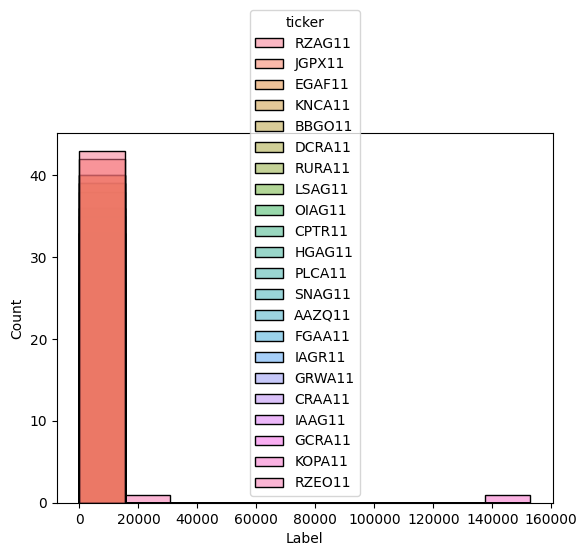

In [441]:
sns.histplot(x=marge_index['Label'],bins=10, hue=marge_index['ticker'])

In [442]:
cut_label = pd.qcut(marge_index['Label'],2)

<Axes: xlabel='Label'>

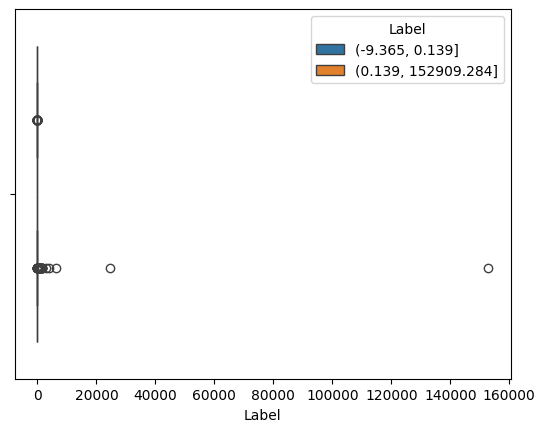

In [443]:
sns.boxplot(x=marge_index['Label'], hue=cut_label)

In [444]:
marge_index['Beta'].describe()

count      683.000000
mean       151.878524
std       2966.184748
min        -10.855560
25%         -0.000594
50%          0.061306
75%          0.641356
max      76448.468415
Name: Beta, dtype: float64

In [445]:
rotulo = marge_index.drop(columns=['index','Open','Beta'])

### Dados de Mudanças de preços

### Dados mensais

In [446]:
mensal = pd.read_csv('./../assets/mes_data.csv')

# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0,ticker,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30,2024.0-3.0
1,1,AAZQ,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30,2024.0-3.0
2,2,AAZQ,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31,2024.0-3.0
3,3,AAZQ,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28,2024.0-2.0
4,4,AAZQ,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31,2024.0-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29,2022.0-2.0
889,889,XPCA,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31,2022.0-1.0
890,890,XPCA,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25,2022.0-1.0
891,891,XPCA,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31,2022.0-1.0


# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [447]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [448]:
mensal[mensal.isna()] = 0
mensal

/tmp/ipykernel_3355/3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


,Unnamed: 0,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30 00:00:00,2024-3
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30 00:00:00,2024-3
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31 00:00:00,2024-3
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28 00:00:00,2024-2
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31 00:00:00,2024-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29 00:00:00,2022-2
889,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31 00:00:00,2022-1
890,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25 00:00:00,2022-1
891,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31 00:00:00,2022-1


In [449]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [450]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [451]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+09,-5.747045e+08,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.730684e+10,-1.730684e+09,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+10,-8.653422e+08,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.922983e+11,-1.922983e+08,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,7.430380e+09,-7.430380e+08,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [452]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [453]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [454]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [455]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [456]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [457]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [458]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,ticker,Ano_Quarter
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,AAZQ,2024-2
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0,AAZQ,2024-1
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0,AAZQ,2023-4
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0,AAZQ,2023-3
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0,AAZQ,2023-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0,XPCA,2022-3
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,XPCA,2022-2
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1


In [459]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [460]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [461]:
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [ ]:
def convert_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        try:
            df[column] = df[column].astype(str)
            df[column] = df[column].str.replace("%", "")
            df[column] = df[column].str.replace(".", "")
            df[column] = df[column].str.replace(",", ".")
            df[column] = pd.to_numeric(df[column], errors='raise')
            print(f"Converted column {column} to numeric.")
        except Exception as e:
            print(f"Error converting column {column}: {e}")
    return df

In [467]:
mensal = convert_to_numeric(mensal, mensal.columns.tolist())

Converted column Unnamed: 0 to numeric.
Error converting column ticker: Unable to parse string "AAZQ" at position 0
Error converting column Data da Informação sobre detalhamento do número de cotistas¹: Unable to parse string "30/09/2024" at position 0
Converted column Número de cotistas to numeric.
Converted column Pessoa física to numeric.
Converted column Pessoa jurídica não financeira to numeric.
Converted column Banco comercial to numeric.
Converted column Corretora ou distribuidora to numeric.
Converted column Outras pessoas jurídicas financeiras to numeric.
Converted column Investidores não residentes to numeric.
Converted column Entidade aberta de previdência complementar to numeric.
Converted column Entidade fechada de previdência complementar to numeric.
Converted column Regime próprio de previdência dos servidores públicos to numeric.
Converted column Sociedade seguradora ou resseguradora to numeric.
Converted column Sociedade de capitalização e de arrendamento mercantil to n

In [371]:
mensal.dtypes

Unnamed: 0                                                        int64
ticker                                                           object
Data da Informação sobre detalhamento do número de cotistas¹     object
Número de cotistas                                              float64
Pessoa física                                                   float64
                                                                 ...   
Total do passivo                                                float64
Certificado de Recebíveis Imobiliários (CRI)                    float64
Letras de Crédito Imobiliário (LCI)                             float64
Data                                                             object
Ano_Quarter                                                      object
Length: 88, dtype: object

In [372]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1067,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1069,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [373]:
final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')
final['Date'] = final_date.dt.to_period('M')
final['Date']

/tmp/ipykernel_3355/2064336292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: Date, Length: 1071, dtype: period[M]

In [374]:
columns_to_drop = list(filter(lambda column: 'Unnamed' in column,final.columns))
columns_to_drop.append('NaN')
columns_to_drop.append('0')
final = final.drop(columns=columns_to_drop)
final


,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [375]:
final.drop_duplicates(subset=['ticker','Date'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [376]:
final.to_csv('../assets/final.csv')

In [377]:
final.shape

(1071, 204)

In [378]:
final[final.isna()] = 0

/tmp/ipykernel_3355/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0
/tmp/ipykernel_3355/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [379]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [380]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


Juntar final com label

In [381]:
final.columns 

Index(['ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       'Entidade aberta de previdência complementar',
       ...
       ' (+) Resultado financeiro que excede o mínimo de 95%⁷.',
       ' Rendimentos declarados',
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       ' (-) Parce

In [382]:
final['ticker'] = final['ticker'] + '11'

In [383]:
# final['Data'] = final['Data'].dt.to_period('M')
final['Date'] = pd.to_datetime(final['Data']).dt.to_period('M')
rotulo['Date']

0      2021-10
1      2021-11
2      2021-11
3      2021-12
4      2021-12
        ...   
682    2025-04
683    2025-04
684    2025-04
685    2025-04
686    2025-04
Name: Date, Length: 687, dtype: period[M]

In [384]:
len(final['ticker'].unique())

29

In [385]:
len(rotulo['ticker'].unique())

22

In [386]:
rotulo

,Date,ticker,Label
0,2021-10,RZAG11,-0.001761
1,2021-11,JGPX11,0.018558
2,2021-11,RZAG11,0.021209
3,2021-12,JGPX11,3.455242
4,2021-12,RZAG11,-0.044589
...,...,...,...
682,2025-04,OIAG11,-1.972373
683,2025-04,PLCA11,944.088341
684,2025-04,RURA11,-1.759042
685,2025-04,RZAG11,0.708678


In [387]:
final = pd.merge(final,rotulo,on=['Date','ticker'])

In [388]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.021018
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.192705
670,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.192705
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004104


In [389]:
final['Label'].unique()

array([ 8.10218529e-02,  2.01193627e-02,  1.79443665e-01,  6.00362187e-01,
        3.82380375e-02, -4.02203766e-03,  1.50030745e-03,  4.17937803e-03,
        1.72079067e-02,  1.47117149e-02, -5.75156813e-04, -2.63461010e-04,
        8.04116473e-04,  4.21867548e-03,  1.20395580e-02, -1.61874531e-02,
       -3.54523378e-02,  3.35048612e-03, -4.49852388e-03,  3.05005605e-03,
        2.29461611e-02, -1.24860711e-04,  1.01058167e+01,  2.92741641e+00,
        1.16291538e+00,  2.75893699e+00,  3.77033976e-01,  5.25179095e-01,
        5.40674280e-01,  8.02115347e-01,  7.33880310e-01,  1.23508237e+00,
        5.93520272e-01,  2.02079133e+00,  5.21106532e-01,  7.54583141e-01,
        1.24176841e+00,  2.41800583e+00,  4.63113803e+00,  5.83331356e-01,
        2.14565121e-01,  3.09294632e-01,  4.48820121e-01,  5.11604979e+00,
        3.88488209e-01,  1.95727334e-01,  1.15232497e+00,  7.37014825e-01,
        1.70698651e+00,  4.54712685e-01,  1.04100867e+00,  1.87351715e+00,
        6.12003642e+00,  

Removendo duplicacatas

In [390]:
Unnamed_column = filter(lambda column: 'Unnamed' in column, final.columns)
final = final.drop(columns=Unnamed_column)
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.021018
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.192705
670,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.192705
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004104


In [391]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,SNAG11,28/02/2023,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,...,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,2023-02,0.126295
667,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.021018
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.192705
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004104


Removendo dados categoricos

In [392]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.081022
1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.020119
2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.179444
3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.600362
4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.126295
667,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.021018
669,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.192705
671,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.004104


In [393]:
size = len(final)
size

525

In [394]:
final['Label'].describe()

count      524.000000
mean        65.014283
std       1111.243499
min         -0.044589
25%          0.003776
50%          0.127072
75%          0.920530
max      24635.792532
Name: Label, dtype: float64

In [395]:
def remove_outliers(df, coluna):
    # Calcula os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra os dados que estão dentro dos limites
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_filtrado

final = remove_outliers(final, 'Label')
print("Dados originais:")
final

Dados originais:


,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.081022
1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.020119
2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.179444
3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.600362
4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.126295
667,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.021018
669,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.192705
671,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.004104


In [396]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.081022
1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.020119
2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.179444
3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.600362
4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.126295
667,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.021018
669,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.192705
671,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.004104


<Axes: >

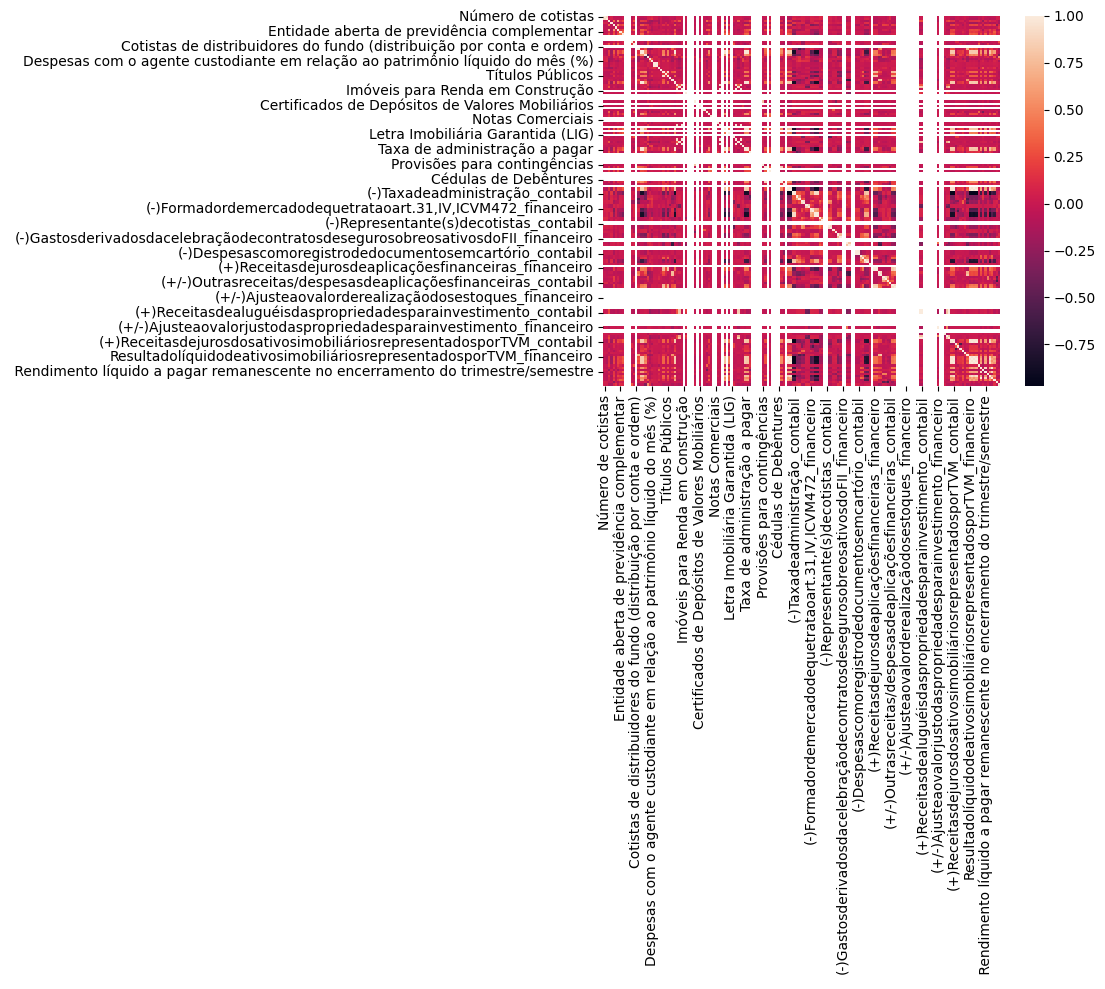

In [397]:
corr = final.corr('pearson')
sns.heatmap(data=corr)

Tentando ver as variaveis que mais interefem no label

In [398]:
corr['Label'].describe()

count    124.000000
mean      -0.007258
std        0.136650
min       -0.327988
25%       -0.081390
50%       -0.029736
75%        0.042083
max        1.000000
Name: Label, dtype: float64

In [399]:
corr.loc[(corr['Label'] < -0.3) | (corr['Label'] > 0.3)]['Label']

Fundos de investimento imobiliário    0.302409
Número de Cotas Emitidas             -0.327988
Valor Patrimonial das Cotas – R$      0.554319
Label                                 1.000000
Name: Label, dtype: float64

In [400]:
corr.loc[(corr['Dividend Yield do Mês de Referência³ (%)'] < -0.3) | (corr['Dividend Yield do Mês de Referência³ (%)'] > 0.3)]['Dividend Yield do Mês de Referência³ (%)']

Dividend Yield do Mês de Referência³ (%)                               1.000000
 (-) Rendimentos pagos antecipadamente durante o trimestre/semestre    0.323384
Name: Dividend Yield do Mês de Referência³ (%), dtype: float64

In [401]:
corr.loc[(corr[' % do resultado financeiro líquido declarado no trimestre/semestre'] < -0.3) | (corr[' % do resultado financeiro líquido declarado no trimestre/semestre'] > 0.3)][' % do resultado financeiro líquido declarado no trimestre/semestre']

(+/-)Resultadonavendadeaplicaçõesfinanceiras_financeiro               0.474964
(+/-)Resultadonavendadeaplicaçõesfinanceiras_contabil                 0.468397
 % do resultado financeiro líquido declarado no trimestre/semestre    1.000000
Name:  % do resultado financeiro líquido declarado no trimestre/semestre, dtype: float64

In [402]:
corr.loc[corr['Ativo – R$'].abs() > 0.3]['Ativo – R$']

Corretora ou distribuidora                                                                                                         0.311920
Investidores não residentes                                                                                                        0.319996
Entidade fechada de previdência complementar                                                                                       0.356760
Ativo – R$                                                                                                                         1.000000
Patrimônio Líquido – R$                                                                                                            0.999461
Número de Cotas Emitidas                                                                                                           0.609819
Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)                                                     0.469806
Títulos Públicos    

In [403]:
corr.columns.tolist()

['Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)',
 'Rentabilidade Efetiva Mensal (%)',
 'Rentabilidade Patrimonial do Mês de R

In [404]:
interval = [final['Label'].min(),final['Label'].quantile(.33),final['Label'].quantile(.66),final['Label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

<Axes: xlabel='Label', ylabel='Count'>

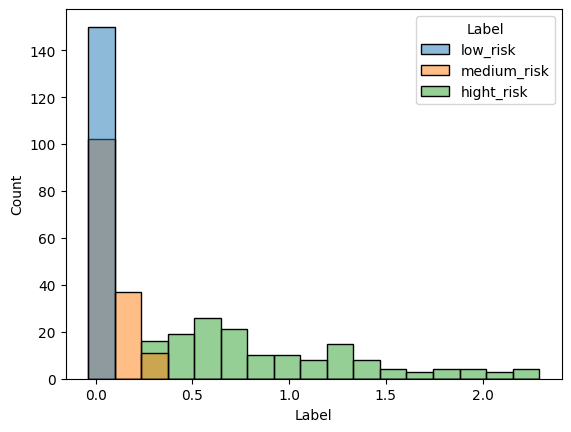

In [405]:
hue = pd.cut(final['Label'],bins=interval,labels=labels)
sns.histplot(x=final['Label'], hue=hue)

In [406]:
final['label'] = hue

### RFE

In [407]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

final =final.dropna()
# Carregando um dataset de exemplo
X = final.drop(columns=['label'])
y = final['label']

# Definindo o modelo base (pode ser qualquer estimador com coef_ ou feature_importances_)
modelo = LogisticRegression(max_iter=200)

# Criando o RFE - selecionando 2 features
rfe = RFE(estimator=modelo, n_features_to_select=15)

# Fitando o RFE nos dados
rfe.fit(X, y)

# Verificando as features selecionadas
print("Features selecionadas:", rfe.support_)
print("Ranking das features:", rfe.ranking_)


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Features selecionadas: [False False False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False  True False  True False  True False
 False False False False  True False  True False False  True False False
 False False False False False False False False False False  True False
 False  True False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False  True False False Fal

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [408]:
dict_rfe = {}
for i in range(len(rfe.support_)):
    dict_rfe[final.columns[i]] = int(rfe.ranking_[i])
dict_rfe

{'Número de cotistas': 94,
 'Pessoa física': 92,
 'Pessoa jurídica não financeira': 93,
 'Banco comercial': 106,
 'Corretora ou distribuidora': 104,
 'Outras pessoas jurídicas financeiras': 97,
 'Investidores não residentes': 103,
 'Entidade aberta de previdência complementar': 107,
 'Entidade fechada de previdência complementar': 108,
 'Regime próprio de previdência dos servidores públicos': 158,
 'Sociedade seguradora ou resseguradora': 160,
 'Sociedade de capitalização e de arrendamento mercantil': 159,
 'Fundos de investimento imobiliário': 101,
 'Outros fundos de investimento': 96,
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)': 161,
 'Outros tipos de cotistas não relacionados': 95,
 'Ativo – R$': 11,
 'Patrimônio Líquido – R$': 1,
 'Número de Cotas Emitidas': 1,
 'Valor Patrimonial das Cotas – R$': 91,
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)': 109,
 'Despesas com o agente custodiante em relação ao patrimônio líqu

In [409]:
dict(sorted(dict_rfe.items(), key=lambda item: item[1]))

{'Patrimônio Líquido – R$': 1,
 'Número de Cotas Emitidas': 1,
 'Fundos de Renda Fixa': 1,
 'Direitos reais sobre bens imóveis': 1,
 'Imóveis para Renda Acabados': 1,
 'Debêntures': 1,
 'Certificados de Depósitos de Valores Mobiliários': 1,
 'Fundo de Investimento Imobiliário (FII)': 1,
 'Valores a Receber': 1,
 'Outros Valores a Receber': 1,
 'Outros valores a pagar': 1,
 '(+)ReceitasdejurosdosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 '(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 '(+)ResultadonavendadeativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 ' % do resultado financeiro líquido declarado no trimestre/semestre': 1,
 'Títulos Públicos': 2,
 'Total investido': 3,
 'Contas a Receber por Venda de Imóveis': 4,
 'Resultadolíquidodosativosimobiliários_financeiro': 5,
 'Terrenos': 6,
 'Outros Valores Mobiliários': 7,
 'Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)': 8,
 '(+/-)Ajusteaovalorjustodosati

### Discretizar os Dados

In [410]:
discretized = pd.DataFrame()
for colum in final.columns:
    if colum != 'label':
        discretized[colum] = pd.qcut(final[colum],q=6, duplicates='drop')
discretized['label'] = final['label']
discretized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,"(27.076, 62.306]","(11.927, 31.627]","(44.333, 175.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(1.0, 7.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.317]",medium_risk
1,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
2,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.317]",medium_risk
3,"(27.076, 62.306]","(11.927, 31.627]","(44.333, 175.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(1.0, 7.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(11775182156.0, 29279852724.0]","(-1709021173.333, -596769436.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(1144418224.667, 2494550688.333]","(14119858702.0, 29076538007.667]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.317, 0.743]",hight_risk
4,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(11775182156.0, 29279852724.0]","(-1709021173.333, -596769436.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(1144418224.667, 2494550688.333]","(14119858702.0, 29076538007.667]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,"(27.076, 62.306]","(31.627, 956.0]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(100648536695.0, 1062597405635.0]","(-51413515.333, 0.0]","(31337255175.0, 246239076605.0]","(793150.0, 974711.0]","(400991391.0, 1144418224.667]","(29076538007.667, 102386609385.0]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.317]",medium_risk
667,"(12.357, 27.076]","(11.927, 31.627]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(2560920025.0, 11775182156.0]","(-51413515.333, 0.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(400991391.0, 1144418224.667]","(3131010101.333, 14119858702.0]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
669,"(12.357, 27.076]","(11.927, 31.627]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5

In [411]:
from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o label
normalized

/tmp/ipykernel_3355/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3355/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3355/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,0.030382,0.031464,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.051154,medium_risk
1,0.029983,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.025012,medium_risk
2,0.029645,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.093401,medium_risk
3,0.028106,0.029183,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.274079,hight_risk
4,0.028387,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.032789,medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.035393,0.036508,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,0.070587,hight_risk
451,0.025728,0.026812,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.025397,hight_risk
452,0.023146,0.024227,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.099093,hight_risk
453,0.014620,0.015684,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,0.018137,hight_risk


# SVM

Separar treinamento teste

In [412]:
from sklearn.model_selection import train_test_split
normalized = normalized.dropna()
X = normalized.drop(columns=['label'])
y = normalized['label']
X = X.loc[:,rfe.support_]
# Separação: 70% treino, 30% teste (pode ajustar o test_size se quiser)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

normalized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,0.030382,0.031464,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.051154,medium_risk
1,0.029983,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.025012,medium_risk
2,0.029645,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.093401,medium_risk
3,0.028106,0.029183,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.274079,hight_risk
4,0.028387,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.032789,medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.035393,0.036508,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,0.070587,hight_risk
451,0.025728,0.026812,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.025397,hight_risk
452,0.023146,0.024227,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.099093,hight_risk
453,0.014620,0.015684,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,0.018137,hight_risk


In [413]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
cs = [.5,1,10]
kernels = ['poly','rbf']
for c in cs:
    for kernel in kernels:
        svc = SVC(kernel=kernel,C=c,probability=True, decision_function_shape='ovo', random_state=0)
        svc.fit(X=X_train,y=y_train)
        y_predict = svc.predict(X=X_test)
        print(f'C:{c}, kernel: {kernel}')
        # print(f'Acuracia: {accuracy_score(y_true=y_test,y_pred=y_predict)}')
        print(confusion_matrix(y_true=y_test,y_pred=y_predict))
        print(classification_report(y_test, y_predict))
        print('------------------------------------------------------')
        
        


C:0.5, kernel: poly
[[22  0 17]
 [ 1  0 22]
 [ 7  0 24]]
              precision    recall  f1-score   support

  hight_risk       0.73      0.56      0.64        39
    low_risk       0.00      0.00      0.00        23
 medium_risk       0.38      0.77      0.51        31

    accuracy                           0.49        93
   macro avg       0.37      0.45      0.38        93
weighted avg       0.43      0.49      0.44        93

------------------------------------------------------
C:0.5, kernel: rbf
[[22  0 17]
 [ 4  2 17]
 [10  0 21]]
              precision    recall  f1-score   support

  hight_risk       0.61      0.56      0.59        39
    low_risk       1.00      0.09      0.16        23
 medium_risk       0.38      0.68      0.49        31

    accuracy                           0.48        93
   macro avg       0.66      0.44      0.41        93
weighted avg       0.63      0.48      0.45        93

------------------------------------------------------
C:1, kernel: po

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

C:1, kernel: rbf
[[21  0 18]
 [ 4  2 17]
 [ 9  0 22]]
              precision    recall  f1-score   support

  hight_risk       0.62      0.54      0.58        39
    low_risk       1.00      0.09      0.16        23
 medium_risk       0.39      0.71      0.50        31

    accuracy                           0.48        93
   macro avg       0.67      0.45      0.41        93
weighted avg       0.63      0.48      0.45        93

------------------------------------------------------
C:10, kernel: poly
[[24  0 15]
 [ 1  7 15]
 [ 8  3 20]]
              precision    recall  f1-score   support

  hight_risk       0.73      0.62      0.67        39
    low_risk       0.70      0.30      0.42        23
 medium_risk       0.40      0.65      0.49        31

    accuracy                           0.55        93
   macro avg       0.61      0.52      0.53        93
weighted avg       0.61      0.55      0.55        93

------------------------------------------------------
C:10, kernel: rbf


In [414]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados
normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o label

# Removendo NaN
normalized = normalized.dropna()

# Separação de X e y
X = normalized.drop(columns=['label'])
y = normalized['label']

# Aplicando RFE para seleção de features
modelo = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=modelo, n_features_to_select=15)
rfe.fit(X, y)

# Filtrando as features selecionadas
X = X.loc[:, rfe.support_]

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_train, y_train)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    print(confusion_matrix(y_test, y_predict_rf))

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))
# Aplicando Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Matriz de Confusão:")
print(confusion_matrix(y_test, y_predict_rf))

print("\nRandom Forest - Acurácia:")
print(accuracy_score(y_test, y_predict_rf))

print("\nRandom Forest - Relatório de Classificação:")
print(classification_report(y_test, y_predict_rf))


/tmp/ipykernel_3355/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3355/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3355/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Random Forest (n_estimators=10) - Matriz de Confusão:
[[30  3  6]
 [ 2 17  4]
 [ 9  8 14]]

Random Forest - Acurácia:
0.6559139784946236

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.73      0.77      0.75        39
    low_risk       0.61      0.74      0.67        23
 medium_risk       0.58      0.45      0.51        31

    accuracy                           0.66        93
   macro avg       0.64      0.65      0.64        93
weighted avg       0.65      0.66      0.65        93

Random Forest (n_estimators=100) - Matriz de Confusão:
[[32  0  7]
 [ 1 18  4]
 [13  3 15]]

Random Forest - Acurácia:
0.6989247311827957

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.70      0.82      0.75        39
    low_risk       0.86      0.78      0.82        23
 medium_risk       0.58      0.48      0.53        31

    accuracy                        

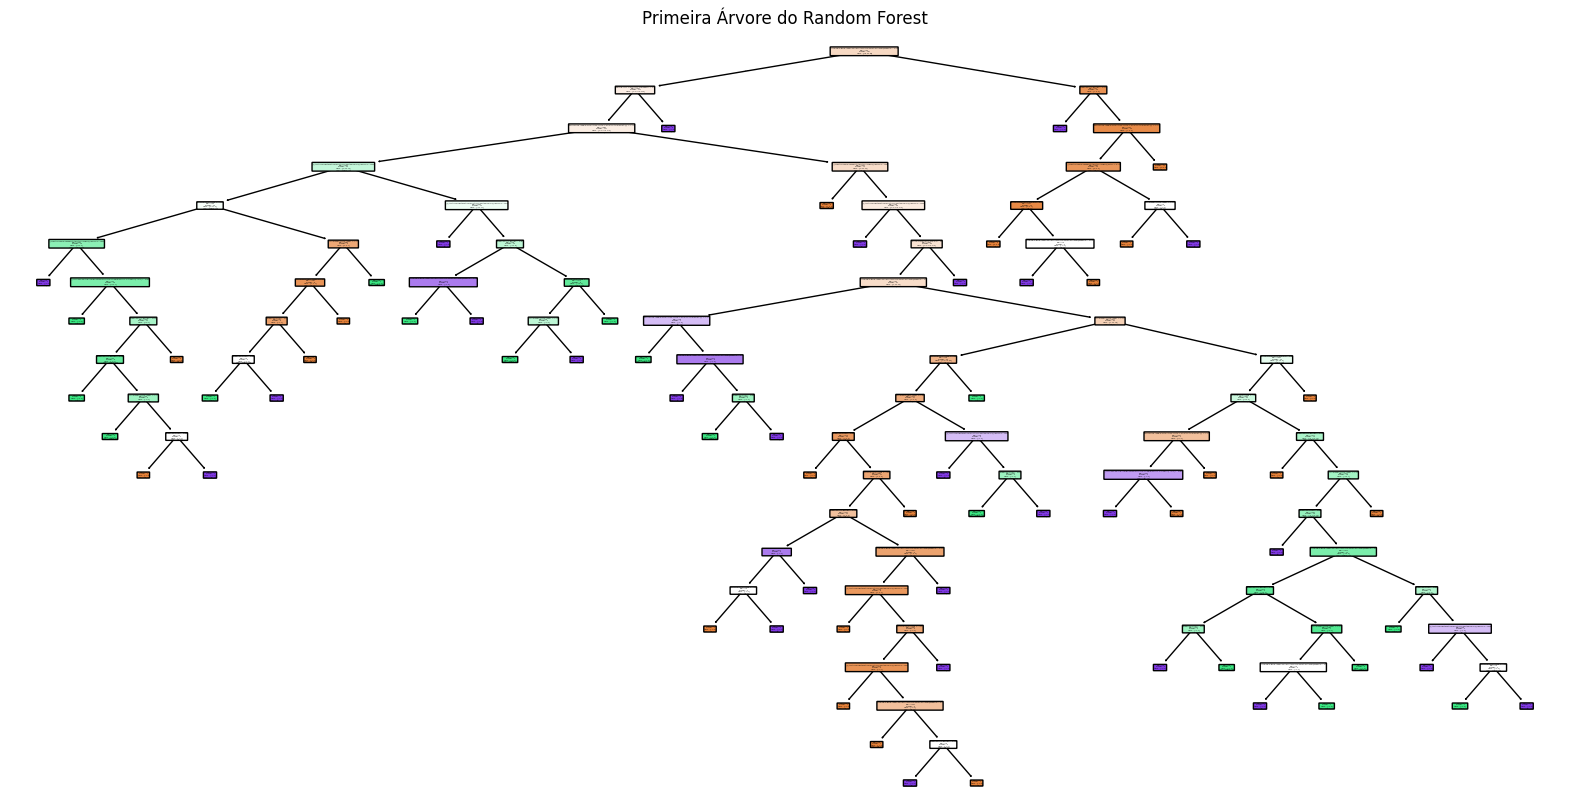

In [415]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Acessar a primeira árvore do Random Forest
first_tree = rf.estimators_[0]

# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=X.columns, class_names=y.cat.categories, filled=True, rounded=True)
plt.title("Primeira Árvore do Random Forest")
plt.show()

# RNA

In [416]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Modelo com duas camadas intermediárias utilizando ReLU.
model_relu = Sequential([
    Dense(64, input_dim=15),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

model_relu.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_86 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.51 KB)

 Trainable params: 3,203 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

In [417]:
X_train.dtypes
# y_train.dtypes

Número de cotistas                                                                                       float64
Entidade aberta de previdência complementar                                                              float64
Fundos de investimento imobiliário                                                                       float64
Número de Cotas Emitidas                                                                                 float64
Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)                            float64
Terrenos                                                                                                 float64
Outros Valores a Receber                                                                                 float64
Taxa de administração a pagar                                                                            float64
Taxa de performance a pagar                                                                     

In [418]:
# Convert categorical labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train.cat.codes, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test.cat.codes, num_classes=3)

# Train the model
model_relu.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Avaliação do modelo
y_predict_relu = model_relu.predict(X_test)
y_predict_relu = tf.argmax(y_predict_relu, axis=1)
y_test_decoded = tf.argmax(y_test_encoded, axis=1)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2792 - loss: 1.1188
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4213 - loss: 1.0827 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4496 - loss: 1.0698 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4339 - loss: 1.0553 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4334 - loss: 1.0484 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4662 - loss: 1.0299 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5104 - loss: 1.0298 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5166 - loss: 1.0027 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5321 - loss: 0.9958 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5746 - loss: 0.9628
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [419]:
print("Modelo ReLU - Matriz de Confusão:")
print(confusion_matrix(y_test_decoded, y_predict_relu))
print(classification_report(y_test_decoded, y_predict_relu))

Modelo ReLU - Matriz de Confusão:
[[ 0 15  8]
 [ 0 20 11]
 [ 0 11 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.43      0.65      0.52        31
           2       0.60      0.72      0.65        39

    accuracy                           0.52        93
   macro avg       0.34      0.45      0.39        93
weighted avg       0.39      0.52      0.45        93



/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [420]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurações para testar
num_layers_options = [1, 2, 3]  # Número de camadas ocultas
neurons_per_layer_options = [16, 32, 64]  # Número de neurônios por camada
activation_functions = ['relu', 'tanh', 'sigmoid']  # Funções de ativação
output_activation = 'softmax'  # Função de ativação da camada de saída
learning_rate = 0.001  # Taxa de aprendizado
epochs = 50  # Número máximo de épocas
batch_size = 32  # Tamanho do lote

# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop para testar diferentes configurações
for num_layers in num_layers_options:
    for neurons in neurons_per_layer_options:
        for activation in activation_functions:
            print(f"Testing configuration: {num_layers} layers, {neurons} neurons/layer, {activation} activation")

            # Construção do modelo
            model = Sequential()
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            for _ in range(num_layers - 1):
                model.add(Dense(neurons))
                model.add(Activation(activation))
            model.add(Dense(3))  # 3 classes de saída
            model.add(Activation(output_activation))

            # Compilação do modelo
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Treinamento do modelo
            model.fit(X_train, y_train_encoded,
                      validation_data=(X_test, y_test_encoded),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping],
                      verbose=0)

            # Avaliação do modelo
            y_predict = model.predict(X_test)
            y_predict_classes = np.argmax(y_predict, axis=1)
            y_test_classes = np.argmax(y_test_encoded, axis=1)

            print("Confusion Matrix:")
            print(confusion_matrix(y_test_classes, y_predict_classes))
            print("Classification Report:")
            print(classification_report(y_test_classes, y_predict_classes))
            print("------------------------------------------------------")

Testing configuration: 1 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Confusion Matrix:
[[ 1 18  4]
 [ 0 21 10]
 [ 0 11 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        23
           1       0.42      0.68      0.52        31
           2       0.67      0.72      0.69        39

    accuracy                           0.54        93
   macro avg       0.70      0.48      0.43        93
weighted avg       0.67      0.54      0.48        93

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Confusion Matrix:
[[ 3 14  6]
 [ 1 20 10]
 [ 0 11 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.13      0.22        23
           1       0.44      0.65      0.53        31
           2       0.64      0.72      0.67        39

    accuracy                           0.55        93
   macro avg       0.61      0.50      0.47        93
weighted avg       0.60      0.55      0.51        93

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  1 30]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      0.03      0.06        31
           2       0.42      1.00      0.60        39

    accuracy                           0.43        93
   macro avg       0.47      0.34      0.22        93
weighted avg       0.51      0.43      0.27        93

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Confusion Matrix:
[[ 6 15  2]
 [ 4 22  5]
 [ 0 11 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       0.46      0.71      0.56        31
           2       0.80      0.72      0.76        39

    accuracy                           0.60        93
   macro avg       0.62      0.56      0.56        93
weighted avg       0.64      0.60      0.59        93

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Confusion Matrix:
[[ 6 16  1]
 [ 4 22  5]
 [ 1 11 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.26      0.35        23
           1       0.45      0.71      0.55        31
           2       0.82      0.69      0.75        39

    accuracy                           0.59        93
   macro avg       0.60      0.55      0.55        93
weighted avg       0.63      0.59      0.59        93

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Confusion Matrix:
[[ 0  1 22]
 [ 0  3 28]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.75      0.10      0.17        31
           2       0.44      1.00      0.61        39

    accuracy                           0.45        93
   macro avg       0.40      0.37      0.26        93
weighted avg       0.43      0.45      0.31        93

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Confusion Matrix:
[[ 6 16  1]
 [ 4 22  5]
 [ 0 12 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       0.44      0.71      0.54        31
           2       0.82      0.69      0.75        39

    accuracy                           0.59        93
   macro avg       0.62      0.55      0.55        93
weighted avg       0.64      0.59      0.59        93

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Confusion Matrix:
[[ 8 13  2]
 [ 5 22  4]
 [ 2 10 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.35      0.42        23
           1       0.49      0.71      0.58        31
           2       0.82      0.69      0.75        39

    accuracy                           0.61        93
   macro avg       0.61      0.58      0.58        93
weighted avg       0.64      0.61      0.61        93

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Confusion Matrix:
[[ 0  1 22]
 [ 0  4 27]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.80      0.13      0.22        31
           2       0.44      1.00      0.61        39

    accuracy                           0.46        93
   macro avg       0.41      0.38      0.28        93
weighted avg       0.45      0.46      0.33        93

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Confusion Matrix:
[[ 3 19  1]
 [ 0 26  5]
 [ 1 13 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.13      0.22        23
           1       0.45      0.84      0.58        31
           2       0.81      0.64      0.71        39

    accuracy                           0.58        93
   macro avg       0.67      0.54      0.51        93
weighted avg       0.67      0.58      0.55        93

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Confusion Matrix:
[[ 1 19  3]
 [ 1 25  5]
 [ 0 13 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.08        23
           1       0.44      0.81      0.57        31
           2       0.76      0.67      0.71        39

    accuracy                           0.56        93
   macro avg       0.57      0.51      0.45        93
weighted avg       0.59      0.56      0.51        93

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  0 31]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        31
           2       0.42      1.00      0.59        39

    accuracy                           0.42        93
   macro avg       0.14      0.33      0.20        93
weighted avg       0.18      0.42      0.25        93

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Confusion Matrix:
[[ 6 16  1]
 [ 4 22  5]
 [ 0 12 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       0.44      0.71      0.54        31
           2       0.82      0.69      0.75        39

    accuracy                           0.59        93
   macro avg       0.62      0.55      0.55        93
weighted avg       0.64      0.59      0.59        93

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Confusion Matrix:
[[ 9 13  1]
 [ 5 22  4]
 [ 2 10 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.49      0.71      0.58        31
           2       0.84      0.69      0.76        39

    accuracy                           0.62        93
   macro avg       0.63      0.60      0.60        93
weighted avg       0.66      0.62      0.63        93

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  1 30]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      0.03      0.06        31
           2       0.42      1.00      0.60        39

    accuracy                           0.43        93
   macro avg       0.47      0.34      0.22        93
weighted avg       0.51      0.43      0.27        93

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Confusion Matrix:
[[14  7  2]
 [ 8 19  4]
 [ 3 10 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.53      0.61      0.57        31
           2       0.81      0.67      0.73        39

    accuracy                           0.63        93
   macro avg       0.63      0.63      0.63        93
weighted avg       0.66      0.63      0.64        93

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Confusion Matrix:
[[ 9 14  0]
 [ 4 23  4]
 [ 2 10 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.39      0.47        23
           1       0.49      0.74      0.59        31
           2       0.87      0.69      0.77        39

    accuracy                           0.63        93
   macro avg       0.65      0.61      0.61        93
weighted avg       0.68      0.63      0.64        93

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  3 28]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      0.10      0.18        31
           2       0.43      1.00      0.60        39

    accuracy                           0.45        93
   macro avg       0.48      0.37      0.26        93
weighted avg       0.52      0.45      0.31        93

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Confusion Matrix:
[[12 10  1]
 [ 3 23  5]
 [ 3 11 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        23
           1       0.52      0.74      0.61        31
           2       0.81      0.64      0.71        39

    accuracy                           0.65        93
   macro avg       0.67      0.63      0.64        93
weighted avg       0.68      0.65      0.65        93

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Confusion Matrix:
[[ 9 11  3]
 [ 4 21  6]
 [ 3  9 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.51      0.68      0.58        31
           2       0.75      0.69      0.72        39

    accuracy                           0.61        93
   macro avg       0.61      0.59      0.59        93
weighted avg       0.62      0.61      0.61        93

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  0 31]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        31
           2       0.42      1.00      0.59        39

    accuracy                           0.42        93
   macro avg       0.14      0.33      0.20        93
weighted avg       0.18      0.42      0.25        93

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Confusion Matrix:
[[19  2  2]
 [ 8 16  7]
 [ 2  9 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.59      0.52      0.55        31
           2       0.76      0.72      0.74        39

    accuracy                           0.68        93
   macro avg       0.67      0.69      0.67        93
weighted avg       0.68      0.68      0.67        93

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Confusion Matrix:
[[ 8 14  1]
 [ 4 23  4]
 [ 1 11 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.35      0.44        23
           1       0.48      0.74      0.58        31
           2       0.84      0.69      0.76        39

    accuracy                           0.62        93
   macro avg       0.65      0.59      0.60        93
weighted avg       0.67      0.62      0.62        93

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  0 31]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        31
           2       0.42      1.00      0.59        39

    accuracy                           0.42        93
   macro avg       0.14      0.33      0.20        93
weighted avg       0.18      0.42      0.25        93

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Confusion Matrix:
[[14  7  2]
 [ 8 18  5]
 [ 3  9 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.53      0.58      0.55        31
           2       0.79      0.69      0.74        39

    accuracy                           0.63        93
   macro avg       0.63      0.63      0.63        93
weighted avg       0.65      0.63      0.64        93

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Confusion Matrix:
[[10 12  1]
 [ 5 22  4]
 [ 1 10 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        23
           1       0.50      0.71      0.59        31
           2       0.85      0.72      0.78        39

    accuracy                           0.65        93
   macro avg       0.66      0.62      0.63        93
weighted avg       0.68      0.65      0.65        93

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Confusion Matrix:
[[ 0  0 23]
 [ 0  0 31]
 [ 0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        31
           2       0.42      1.00      0.59        39

    accuracy                           0.42        93
   macro avg       0.14      0.33      0.20        93
weighted avg       0.18      0.42      0.25        93

------------------------------------------------------


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",